# Sistem rekomendasi tempat wisata di indonesia

## Data Collecting

- import library
  - drive
  - numpy
  - pandas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- define files path

In [3]:
s_tourism_rating = f'drive/MyDrive/ML/ML Terapan/tourism_recomendation/tourism_rating.csv'
s_tourism_id = f'drive/MyDrive/ML/ML Terapan/tourism_recomendation/tourism_with_id.csv'

s_tourism_user = f'drive/MyDrive/ML/ML Terapan/tourism_recomendation/user.csv'

- load file

In [4]:
dat_tourism_rating = pd.read_csv(s_tourism_rating,sep=',')
dat_tourism_id = pd.read_csv(s_tourism_id,sep=',')

dat_tourism_user = pd.read_csv(s_tourism_user,sep=',')

## Data understanding

dataset yang digunakan memiliki 4 file yaitu

- tourism_with_id.csv yang berisi informasi tempat wisata di 5 kota besar di indonesia yang berjumlah 437 baris
- user.csv which berisi data dummy user untuk membuat fitur rekomendasi berdasarkan user yang berjumlah 300 baris.
- tourism_rating.csv berisi 3 kolom yaitu user,tempat dan rating yang berfungsi untuk membuat sistem rekomendasi rating yang berjumlah 10000
- package_tourism.csv berisi rekomendasi tempat berdasarkan waktu, biaya, dan rating yang berjumlah 100 baris

namun pada project ini hanya akan digunakan 2 dataset yaitu tourism_with_id dan tourism_rating

Tahap eksplorasi penting untuk memahami variabel-variabel pada data serta korelasi antar variabel. Pemahaman terhadap variabel pada data dan korelasinya akan membantu kita dalam menentukan pendekatan atau algoritma yang cocok untuk data kita. Idealnya, kita melakukan eksplorasi data terhadap seluruh variabel. Namun, pada proyek ini, kita akan mengeksplorasi beberapa variabel saja.

### Data tourism with ID

- dataset ini yang akan kita gunakan dalam membuat model content-based filtering

#### Univariate Exploratory Data Analysis


- menampilkan kolom dari dat_tourism_id

In [ ]:
dat_tourism_id.columns.values

array(['Place_Id', 'Place_Name', 'Description', 'Category', 'City',
       'Price', 'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long',
       'Unnamed: 11', 'Unnamed: 12'], dtype=object)

- menampilkan unik values dari kolom Category

In [ ]:
# Show unique values from a column
unique_values_cat = dat_tourism_id['Category'].unique()
print(unique_values_cat)

['Budaya' 'Taman Hiburan' 'Cagar Alam' 'Bahari' 'Pusat Perbelanjaan'
 'Tempat Ibadah']


- menampilkan unique values dari kolom city

In [ ]:
# Show unique values from a column
unique_values_city = dat_tourism_id['City'].unique()
print(unique_values_city)

['Jakarta' 'Yogyakarta' 'Bandung' 'Semarang' 'Surabaya']


In [ ]:
dat_tourism_id.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.00,437.00,437.00,205.00,437.00,437.00,0.00,437.00
mean,219.00,24652.17,4.44,82.61,-7.10,109.16,nan,219.00
std,126.30,66446.37,0.21,52.87,0.73,1.96,nan,126.30
min,1.00,0.00,3.40,10.00,-8.20,103.93,nan,1.00
25%,110.00,0.00,4.30,45.00,-7.75,107.58,nan,110.00
50%,219.00,5000.00,4.50,60.00,-7.02,110.24,nan,219.00
75%,328.00,20000.00,4.60,120.00,-6.83,110.43,nan,328.00
max,437.00,900000.00,5.00,360.00,1.08,112.82,nan,437.00


Variabel-variabel pada dat_tourism_id dataset adalah sebagai berikut:

- place_id : id tempat
- place_name : nama tempat
- description : deksripsi singkat tentang objek wisata
- category : kategori tempat wisata dimana terdapat 6 kategori yaitu budaya,taman hiburan, cagar alam, bahari, pusat perbelanjaan, tempat ibadah
- city : kota tempat wisata, pada dataset ini masih terbatas pada 5 kota besar yaitu jakarta, yogyakarta, bandung, semarang, surabaya.
- price : harga masuk ke tempat wisata, dimana range mulai dari 0 (gratis) - 900.000
- rating : penilaian tempat
- time_minutes : waktu tempuh
- coordinate : kordinat lokasi
- lat : latitude
- long : longitude
- unnamed 11
- unnamed 12

 terdapat 2 kolom tidak bernama yang tidak diketahui nilainya untuk apa sehinngga lebih baik dihapus saja.

- menampilkan sample 5 data teratas dari dat_tourism_id

In [ ]:
dat_tourism_id.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


- menampilkan jumlah baris dan tipe data

In [ ]:
dat_tourism_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


Berdasarkan output di atas, kita dapat mengetahui bahwa file dat_tourism_id memiliki 437 entri.

- melihat nilai null dari tiap kolom

In [ ]:
dat_tourism_id.isna().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

berdasarkan output diatas kolom time_minutes memiliki 232 nilai null

- cek duplicate column

In [ ]:
dat_tourism_id.duplicated().sum()

0

- menampilkan distribusi kategori

In [ ]:
dat_tourism_id.groupby('Category')['Category'].agg('count')

Category
Bahari                 47
Budaya                117
Cagar Alam            106
Pusat Perbelanjaan     15
Taman Hiburan         135
Tempat Ibadah          17
Name: Category, dtype: int64

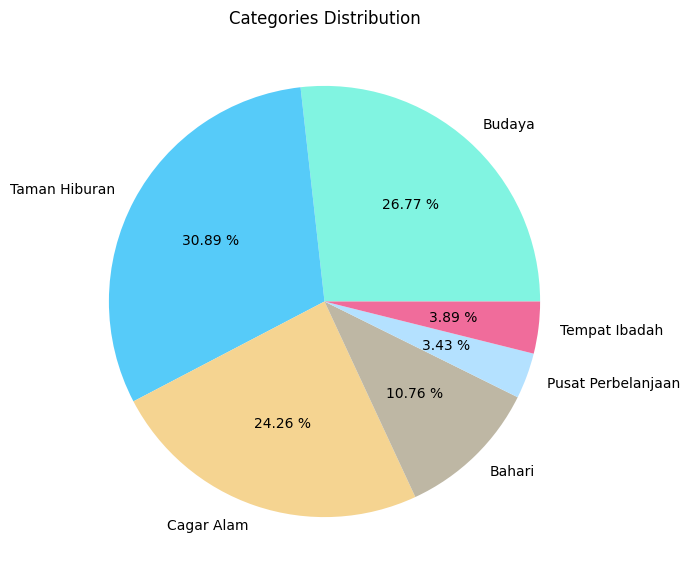

In [ ]:
#  Categories Distribution

['Budaya' 'Taman Hiburan' 'Cagar Alam' 'Bahari' 'Pusat Perbelanjaan'
 'Tempat Ibadah']

from pandas.core.tools.datetimes import overload
BDY = dat_tourism_id.loc[dat_tourism_id['Category'] == 'Budaya'].count()[0]
THN = dat_tourism_id.loc[dat_tourism_id['Category'] == 'Taman Hiburan'].count()[0]
CAM = dat_tourism_id.loc[dat_tourism_id['Category'] == 'Cagar Alam'].count()[0]
BAH = dat_tourism_id.loc[dat_tourism_id['Category'] == 'Bahari'].count()[0]
PPA = dat_tourism_id.loc[dat_tourism_id['Category'] == 'Pusat Perbelanjaan'].count()[0]
TIB = dat_tourism_id.loc[dat_tourism_id['Category'] == 'Tempat Ibadah'].count()[0]

labels = ['Budaya','Taman Hiburan','Cagar Alam','Bahari','Pusat Perbelanjaan','Tempat Ibadah']
colors = ['#81F4E1', '#56CBF9', '#F5D491', '#BEB7A4', '#B4E1FF', '#F06C9B']

plt.figure(figsize = (10,7))
plt.title('Categories Distribution')
plt.pie([BDY, THN, CAM, BAH, PPA, TIB],
        labels = labels,
        colors = colors,
        autopct = '%.2f %%'
        )

plt.show()

### Data tourism Rating

- dataset ini yang akan kita gunakan sebagai variabel pada model colaborative filtering

#### Univariate Exploratory Data Analysis

In [ ]:
dat_tourism_rating.columns.values

array(['User_Id', 'Place_Id', 'Place_Ratings'], dtype=object)

Variabel-variabel pada dat_tourism_id dataset adalah sebagai berikut:

- user_id : id user
- place_Id :  id tempat wisata
- place_ratings : penilaian tempat wisata

- cek jumlah entry dan tipe data

In [ ]:
dat_tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


- melihat statistik deskriptif dari kolom dengan tipe data numerik,

In [ ]:
dat_tourism_rating.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,User_Id,Place_Id,Place_Ratings
count,10000.00,10000.00,10000.00
mean,151.29,219.42,3.07
std,86.14,126.23,1.38
min,1.00,1.00,1.00
25%,77.00,108.75,2.00
50%,151.00,220.00,3.00
75%,226.00,329.00,4.00
max,300.00,437.00,5.00


Dataset tempat wisata ini memiliki rating  terendah 1.00 dan rating tertinggi 5.00 dengan rata-rata 3.07.

- melihat distribusi rating

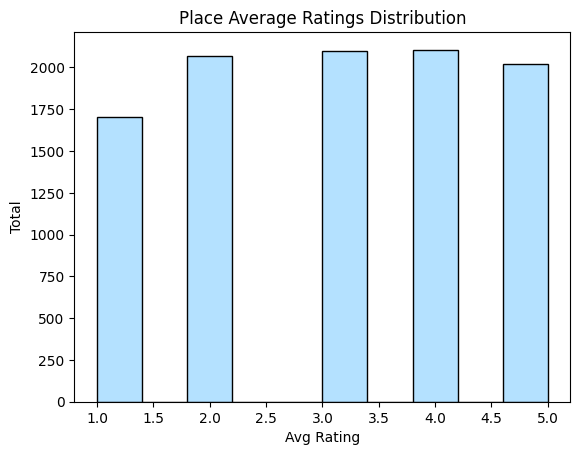

In [ ]:
# Anime's Average Ratings Distribution
plt.hist(dat_tourism_rating.Place_Ratings, color='#B4E1FF', edgecolor='black')
plt.ylabel('Total')
plt.xlabel('Avg Rating')
plt.title("Place Average Ratings Distribution")
plt.show()

- mengecek nilai null

In [ ]:
dat_tourism_rating.isna().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

- menampilkan 5 sample data teratas

In [ ]:
dat_tourism_rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


- menampilkan nama tempat dengn menggabungkan data rating x data id

In [ ]:
dat_tourism_rating_1 = pd.merge(dat_tourism_rating,dat_tourism_id,on='Place_Id')

In [ ]:
user_counts = dat_tourism_rating_1.groupby('Place_Name')['User_Id'].agg('count')

# Mengurutkan data berdasarkan count 'User_Id'
sorted_place_counts = place_counts.sort_values(ascending=False)

# Tampilkan hasil
print(sorted_place_counts)

Place_Id
177    39
298    39
437    38
201    37
208    36
       ..
72     13
124    13
394    13
175    12
51     12
Name: User_Id, Length: 437, dtype: int64


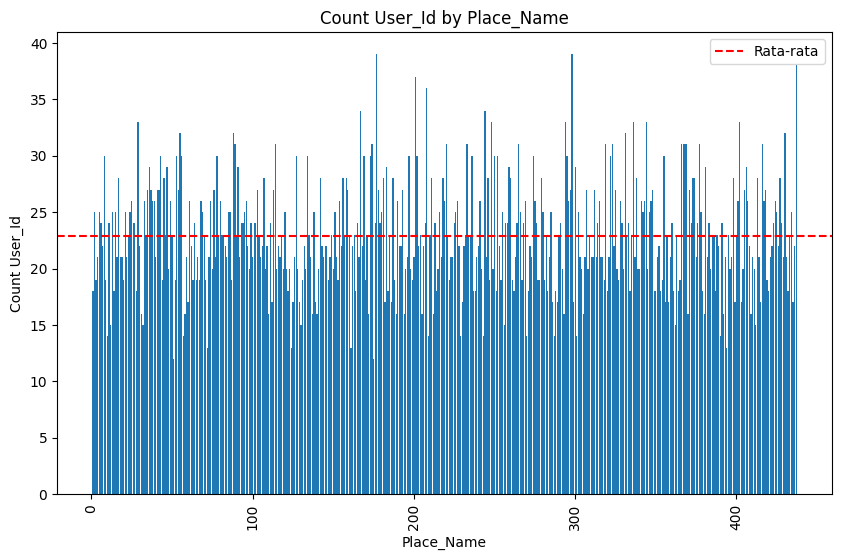

In [ ]:
# Hitung rata-rata count 'User_Id'
mean_place_counts = user_counts.mean()

# Membuat plot visualisasi
plt.figure(figsize=(10, 6))  # Atur ukuran plot sesuai kebutuhan
plt.bar(place_counts.index, place_counts.values)
plt.axhline(mean_place_counts, color='red', linestyle='--', label='Rata-rata')
plt.xlabel('Place_Name')
plt.ylabel('Count User_Id')
plt.title('Count User_Id by Place_Name')
plt.xticks(rotation=90)
plt.legend()
plt.show()

berdasarkan data diatas bahwa jumlah penilaian user terbanyak adalah 39 dan terkecil adalah 12 sedangkan rata2 jumlah penilaian tiap tempat berada pada range 20-25

- menampilkan 10 tempat dengan jumlah penilai user terbanyak

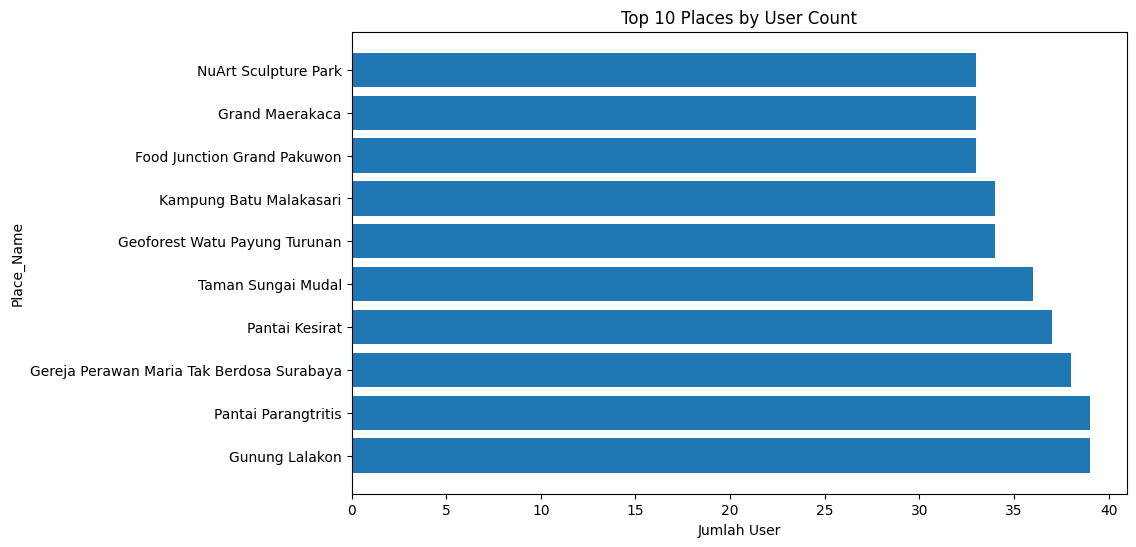

In [ ]:
user_counts = dat_tourism_rating_1.groupby('Place_Name')['User_Id'].agg('count')

# Ambil 10 data teratas
top_10_places = user_counts.nlargest(10)

# Tampilkan hasil
# print(top_10_places)

# Membuat plot visualisasi
plt.figure(figsize=(10, 6))  # Atur ukuran plot sesuai kebutuhan
plt.barh(top_10_places.index, top_10_places.values)
plt.xlabel('Jumlah User')
plt.ylabel('Place_Name')
plt.title('Top 10 Places by User Count')
plt.show()

### Data User

menampilkan sample 5 data teratas

In [ ]:
dat_tourism_user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


Menarik. Kita mendapatkan data lokasi, umur. Jika kita ingin membangun sistem rekomendasi yang lebih kompleks, mungkin kita perlu menyertakan fitur-fitur di atas pada model. Data profile ini berguna jika kita ingin membuat sistem rekomendasi berdasarkan demografi. Namun, untuk studi kasus kali ini, kita tidak akan menggunakan data profile pada model.

- menampilkan jumlah entry, tipe

In [ ]:
dat_tourism_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


- menampilkan deskripsi kolom yang bertipe angka

In [ ]:
dat_tourism_user.describe()

,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


- melihat distribusi umur user

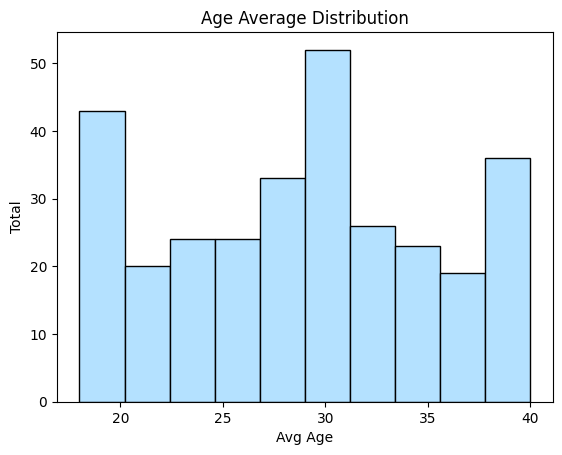

In [ ]:
# Anime's Average Ratings Distribution
plt.hist(dat_tourism_user.Age, color='#B4E1FF', edgecolor='black')
plt.ylabel('Total')
plt.xlabel('Avg Age')
plt.title("Age Average Distribution")
plt.show()

- melihat distribusi user berdasarkan lokasi

In [ ]:
dat_tourism_user.groupby('Location')['User_Id'].agg('count')

Location
Bandung, Jawa Barat              8
Bekasi, Jawa Barat              39
Bogor, Jawa Barat               17
Cilacap, Jawa Tengah             4
Cirebon, Jawa Barat             14
Depok, Jawa Barat               12
Jakarta Barat, DKI Jakarta       6
Jakarta Pusat, DKI Jakarta      10
Jakarta Selatan, DKI Jakarta    14
Jakarta Timur, DKI Jakarta       6
Jakarta Utara, DKI Jakarta      10
Karawang, Jawa Barat             8
Klaten, Jawa Tengah              4
Kota Gede, DIY                   8
Lampung, Sumatera Selatan       20
Madura, Jawa Timur               2
Nganjuk, Jawa Timur              2
Palembang, Sumatera Selatan      5
Ponorogo, Jawa Timur            11
Purwakarat, Jawa Barat           4
Semarang, Jawa Tengah           22
Serang, Banten                   9
Solo, Jawa Tengah                4
Sragen, Jawa Tengah              9
Subang, Jawa Barat              14
Surabaya, Jawa Timur            10
Tanggerang, Banten               8
Yogyakarta, DIY                 20
Name: User_

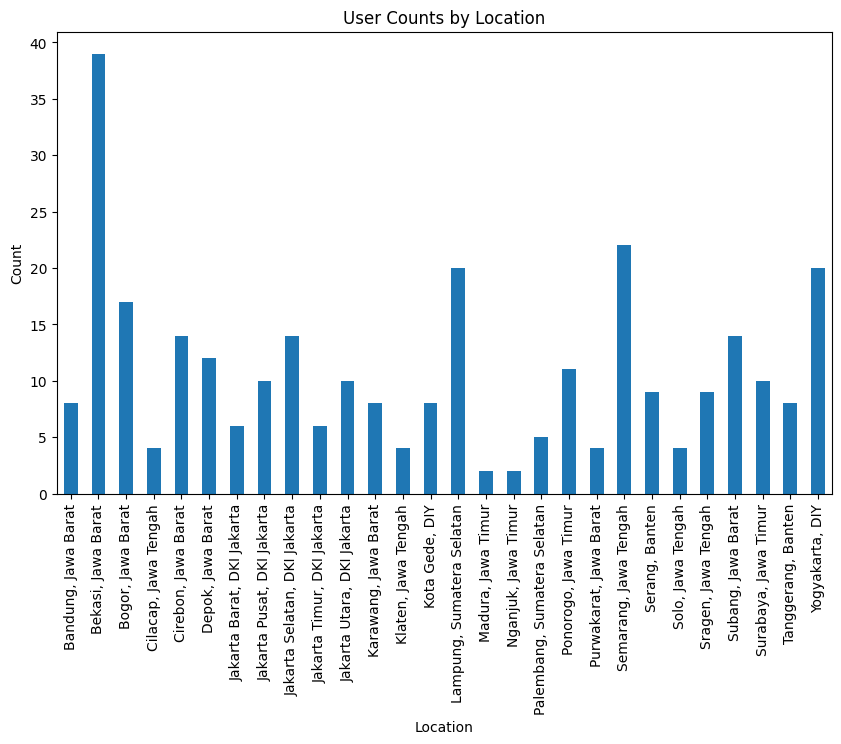

In [ ]:
# Grupkan berdasarkan 'Location' dan hitung jumlah 'User_Id' pada setiap grup
location_counts = dat_tourism_user.groupby('Location')['User_Id'].agg('count')

# Plot bar chart
plt.figure(figsize=(10, 6))  # Atur ukuran plot sesuai kebutuhan
location_counts.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('User Counts by Location')
# plt.xticks(rotation=45)
plt.show()

## Data preparation

In [ ]:
dat_tourism_rating.isna().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [ ]:
dat_tourism_id.isna().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

In [ ]:
dat_tourism_user.isna().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [ ]:
dat_tourism_id.drop(['Rating','Time_Minutes','Coordinate','Lat','Long','Unnamed: 11','Unnamed: 12'],axis=1,inplace=True)
dat_tourism_id

,Place_Id,Place_Name,Description,Category,City,Price
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000
...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0


In [ ]:
dat_rekomendasi = pd.merge(dat_tourism_rating.groupby('Place_Id')['Place_Ratings'].mean(),dat_tourism_id,on='Place_Id')
dat_rekomendasi

,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price
0,1,3.722222,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000
1,2,2.840000,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0
2,3,2.526316,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000
3,4,2.857143,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000
4,5,3.520000,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000
...,...,...,...,...,...,...,...
432,433,3.304348,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000
433,434,2.400000,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0
434,435,3.000000,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0
435,436,3.090909,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0


In [ ]:
dat_rekomendasi.describe()

,Place_Id,Place_Ratings,Price
count,437.000000,437.000000,437.000000
mean,219.000000,3.067236,24652.173913
std,126.295289,0.305788,66446.374709
min,1.000000,2.000000,0.000000
25%,110.000000,2.875000,0.000000
50%,219.000000,3.071429,5000.000000
75%,328.000000,3.285714,20000.000000
max,437.000000,3.967742,900000.000000


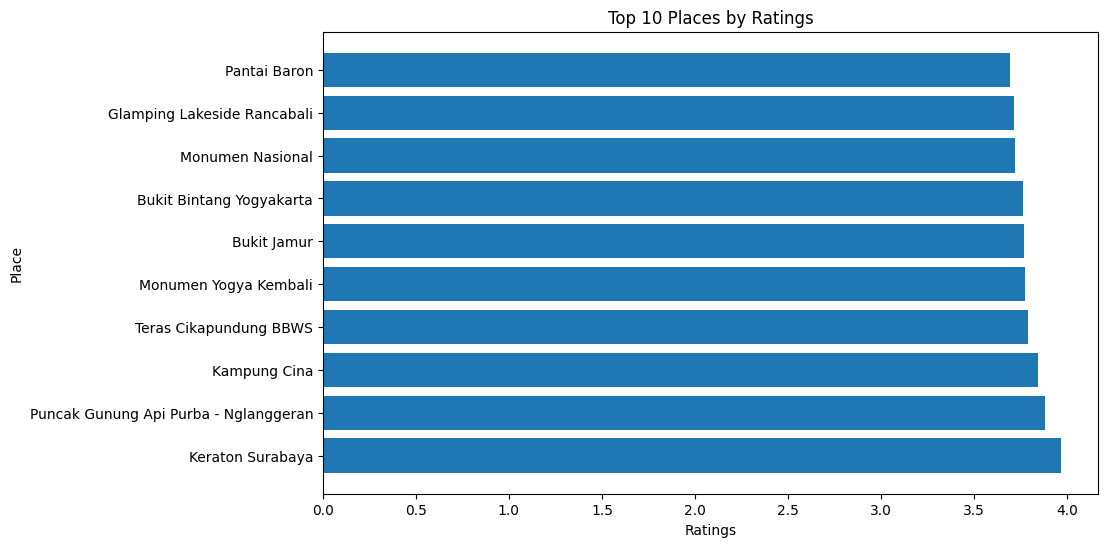

In [ ]:
# Mengurutkan DataFrame berdasarkan nilai tertinggi pada kolom 'ColumnName'
sorted_df = dat_rekomendasi.sort_values('Place_Ratings', ascending=False)

# Menampilkan 10 baris teratas
top_10_rows = sorted_df[['Place_Name','Place_Ratings']].head(10)

# Tampilkan hasil
# print(top_10_rows)

# Membuat plot visualisasi dengan label sumbu x dan y dibalik
plt.figure(figsize=(10, 6))  # Atur ukuran plot sesuai kebutuhan
plt.barh(top_10_rows['Place_Name'], top_10_rows['Place_Ratings'])
plt.xlabel('Ratings')  # Label sumbu x
plt.ylabel('Place')  # Label sumbu y
plt.title('Top 10 Places by Ratings')
plt.show()

## Modeling

### modeling with content based filtering

- Dalam pendekatan ini, digunakan metode TF-IDF dan Cosine Similarity untuk memperoleh rekomendasi yang relevan.

import library
- sastrawi untuk nlp processing
- coisine_similarity
- TfidfVectorizer

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.4 MB/s eta 0:00:00


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.metrics.pairwise import cosine_similarity

- define variabel TfidfVectorizer, stem, stopword

In [ ]:
tv = TfidfVectorizer(max_features=5000)
stem = StemmerFactory().create_stemmer()
stopword = StopWordRemoverFactory().create_stop_word_remover()

- membuat fungsi data preprocessing data
  - menggunakan fungsi lower
  - menggunakan fungsi stem
  - menggunakan fungsi stopword

In [ ]:
def preprocessing(data):
    data = data.lower()
    data = stem.stem(data)
    data = stopword.remove(data)
    return data

- data preparation
  - menyalin dat_rekomendasi
  - membuat kolom baru bernama tags yang merupakan hasil penggabungan kolom description dan kategori
  - menghapus kolom price, place_ratings, description, category, dan city

In [ ]:
dat_content_based_filtering = dat_rekomendasi.copy()
dat_content_based_filtering['Tags'] = dat_content_based_filtering['Description'] + ' ' + dat_content_based_filtering['Category']
dat_content_based_filtering.drop(['Price','Place_Ratings','Description','Category','City'],axis=1,inplace=True)
dat_content_based_filtering

,Place_Id,Place_Name,Tags
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu..."
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...
...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...


- data preprocessing (implementasi fungsi preprocessing)

In [ ]:
dat_content_based_filtering.Tags = dat_content_based_filtering.Tags.apply(preprocessing)
dat_content_based_filtering

,Place_Id,Place_Name,Tags
0,1,Monumen Nasional,monumen nasional populer singkat monas tugu mo...
1,2,Kota Tua,kota tua jakarta juga nama kota tua pusat alun...
2,3,Dunia Fantasi,dunia fantasi sebut dufan tempat hibur letak k...
3,4,Taman Mini Indonesia Indah (TMII),taman mini indonesia indah rupa suatu kawasan ...
4,5,Atlantis Water Adventure,atlantis water adventure kenal atlantis ancol ...
...,...,...,...
432,433,Museum Mpu Tantular,museum negeri mpu tantular buah museum negeri ...
433,434,Taman Bungkul,taman bungkul taman wisata kota letak pusat ko...
434,435,Taman Air Mancur Menari Kenjeran,air mancur tari dancing fountain ada kawasan j...
435,436,Taman Flora Bratang Surabaya,taman flora salah satu taman kota surabaya rup...


- implementasi TF-IDF Vectorizer

In [ ]:
vectors = tv.fit_transform(dat_content_based_filtering.Tags).toarray()
vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

- implementasi Cosine Similarity with vectors inputs and save it as similarity variabel

In [ ]:
similarity = cosine_similarity(vectors)
similarity[0][1:10]

array([0.04510993, 0.07188361, 0.02807929, 0.00479488, 0.01497397,
       0.02458836, 0.00394491, 0.01975822, 0.01633207])

- membuat fungsi content based rekomendasi
  - menggunakan similarity variabel
  - menggunakan fungsi pengurutan
  - menampilkan hasil

In [ ]:
def recommend_by_content_based_filtering(nama_tempat):
    nama_tempat_index = dat_content_based_filtering[dat_content_based_filtering['Place_Name']==nama_tempat].index[0]
    distancess = similarity[nama_tempat_index]
    nama_tempat_list = sorted(list(enumerate(distancess)),key=lambda x: x[1],reverse=True)[1:6]

    recommended_nama_tempats = []
    for i in nama_tempat_list:
        recommended_nama_tempats.append([dat_content_based_filtering.iloc[i[0]].Place_Name]+[i[1]])
        # print(nama_tempats.iloc[i[0]].original_title)

    return recommended_nama_tempats

#### uji coba fungsi content-based rekomendasi
  - uji coba 3 tempat yaitu Monumen nasioanl, taman bangkul dan atlantis water adventure

In [ ]:
recommend_by_content_based_filtering('Monumen Nasional')

[['Monumen Bandung Lautan Api', 0.28683907306335177],
 ['Monumen Selamat Datang', 0.2661577967639709],
 ['Monumen Perjuangan Rakyat Jawa Barat', 0.25729692362006246],
 ['Tugu Muda Semarang', 0.22491138935052768],
 ['Monumen Bambu Runcing Surabaya', 0.20482652874129093]]

In [ ]:
recommend_by_content_based_filtering('Taman Bungkul')

[['Taman Mundu', 0.32682345819114],
 ['Taman Flora Bratang Surabaya', 0.26385187201054355],
 ['Taman Barunawati', 0.25888384483979043],
 ['Taman Balai Kota Bandung', 0.25825864832012657],
 ['Taman Buah Surabaya', 0.22882903814914157]]

In [ ]:
recommend_by_content_based_filtering('Atlantis Water Adventure')

[['Waterpark Kenjeran Surabaya', 0.23389919301008244],
 ['Atlantis Land Surabaya', 0.21468493723053944],
 ['Water Park Bandung Indah', 0.19422573141172442],
 ['Panghegar Waterboom Bandung', 0.18448687624440493],
 ['Batununggal Indah Club', 0.17884151754952304]]

### modeling with Collaborative filtering

- Pendekatai yang digunakan adalah model based.
 dengan metode deeplearning.
- Digunakan model RecommerderNet berbasis TensorFlow untuk mempelajari pola preferensi pelanggan dan interaksi mereka dengan tempat. Model ini menggunakan embedding untuk merepresentasikan user dan tourism. Penggabungan embedding tersebut untuk dapat memprediksi preferensi user terhadap tempat wisata tertentu.

import library
- tensorflow
- keras
- layers

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

- menyalin data rating

In [ ]:
dat_collaborative_filtering = dat_tourism_rating.copy()
dat_collaborative_filtering

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


- encoding
  - Encoding ini berguna dalam proses pembuatan model dan perhitungan dalam sistem rekomendasi untuk mempermudah pengolahan data dan komputasi.

In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = dat_collaborative_filtering['User_Id'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [ ]:
# Mengubah placeID menjadi list tanpa nilai yang sama
tourism_ids = dat_collaborative_filtering['Place_Id'].unique().tolist()

# Melakukan proses encoding placeID
tourism_to_tourism_encoded = {x: i for i, x in enumerate(tourism_ids)}

# Melakukan proses encoding angka ke placeID
tourism_encoded_to_tourism = {i: x for i, x in enumerate(tourism_ids)}

- Mapping
  - Dengan melakukan mapping ini, nilai userID dan placeID pada dataframe dat_collaborative_filtering akan digantikan dengan nilai encoded userID dan placeID yang digunakan dalam proses pemodelan collaborative filtering. Mapping ini berguna dalam membentuk input data yang sesuai dengan format yang dibutuhkan oleh model dan algoritma collaborative filtering.

In [ ]:
# Mapping userID ke dataframe user
dat_collaborative_filtering['user'] = dat_collaborative_filtering['User_Id'].map(user_to_user_encoded)

# Mapping placeID ke dataframe tourism
dat_collaborative_filtering['tourism'] = dat_collaborative_filtering['Place_Id'].map(tourism_to_tourism_encoded)

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah tourism
num_tourism = len(tourism_encoded_to_tourism)
print(num_tourism)

# Mengubah rating menjadi nilai float
dat_collaborative_filtering['Place_Ratings'] = dat_collaborative_filtering['Place_Ratings'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(dat_collaborative_filtering['Place_Ratings'])

# Nilai maksimal rating
max_rating = max(dat_collaborative_filtering['Place_Ratings'])

print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_tourism, min_rating, max_rating
))

300
437
Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


Dengan melakukan perhitungan jumlah user dan tempat wisata, serta mengubah tipe data rating ke float32, dan mendapatkan nilai minimum dan maksimum rating, kita dapat memperoleh informasi yang berguna dalam proses pemodelan collaborative filtering.
- data-data tersebut yang selanjutnya akan digunakan pada modeling

- mengacak urutan baris dalam dataframe dat_collaborative_filtering dengan menggunakan fungsi sample()
  - Mengacak urutan baris dalam dataframe seringkali digunakan untuk memastikan bahwa data yang digunakan dalam proses pembelajaran atau pemodelan tidak memiliki pola tertentu atau bias yang terkait dengan urutan data. Ini membantu dalam mencegah atau mengurangi kemungkinan overfitting dan memastikan hasil yang lebih objektif dalam evaluasi model.

In [ ]:
dat_collaborative_filtering = dat_collaborative_filtering.sample(frac=1, random_state=42)
dat_collaborative_filtering

,User_Id,Place_Id,Place_Ratings,user,tourism
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


#### Split data train dan data test


- define variabel input (x) dan variabel output (y)
  - dilakukan juga normalisasi nilai rating pada kolom 'Place_Ratings' dalam dataframe
  - Hasil normalisasi ini berguna dalam pemodelan collaborative filtering, di mana nilai rating yang dinormalisasi dapat digunakan sebagai target variabel (y) dalam proses pembelajaran model. Normalisasi ini memastikan bahwa rentang nilai rating yang diberikan kepada model berada dalam skala yang seragam dan mempermudah proses perhitungan dan optimisasi pada model.

In [ ]:
# Membuat variabel y untuk membuat rating dari hasil
y = dat_collaborative_filtering['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values


In [ ]:
x = dat_collaborative_filtering[['user', 'tourism']].values

- membagi dataset menjadi data training dan data validasi dengan perbadingan 80:20

In [ ]:
train_indices = int(0.8 * dat_collaborative_filtering.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


#### Training

- membuat model

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_tourism, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_tourism = num_tourism
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.tourism_embedding = layers.Embedding( # layer embeddings tourism
        num_tourism,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.tourism_bias = layers.Embedding(num_tourism, 1) # layer embedding tourism bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    tourism_vector = self.tourism_embedding(inputs[:, 1]) # memanggil layer embedding 3
    tourism_bias = self.tourism_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_tourism = tf.tensordot(user_vector, tourism_vector, 2)

    x = dot_user_tourism + user_bias + tourism_bias

    return tf.nn.sigmoid(x) # activation sigmoid

- compile model

In [ ]:
model = RecommenderNet(num_users, num_tourism, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

- melakukan training pada model

In [ ]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
1000/1000 [==============================] - 3s 2ms/step - loss: 0.6941 - root_mean_squared_error: 0.3460 - val_loss: 0.6931 - val_root_mean_squared_error: 0.3449
Epoch 2/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6867 - root_mean_squared_error: 0.3406 - val_loss: 0.6930 - val_root_mean_squared_error: 0.3448
Epoch 3/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6807 - root_mean_squared_error: 0.3362 - val_loss: 0.6922 - val_root_mean_squared_error: 0.3443
Epoch 4/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6760 - root_mean_squared_error: 0.3328 - val_loss: 0.6925 - val_root_mean_squared_error: 0.3445
Epoch 5/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6721 - root_mean_squared_error: 0.3299 - val_loss: 0.6932 - val_root_mean_squared_error: 0.3449
Epoch 6/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6681 - root_mean_squared_error: 0.3269 - val_l

#### mendapatkan rekomendasi

- mengambil sample user

In [ ]:
tourism_df = dat_tourism_id
df = dat_tourism_rating

# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
tourism_visited_by_user = df[df.User_Id == user_id]

- operasi pada dataframe tourism_df untuk mendapatkan tempat wisata yang belum dikunjungi oleh sample pengguna yang kita dapatkan sebelumnya.

In [ ]:
tourism_not_visited = tourism_df[~tourism_df['Place_Id'].isin(tourism_visited_by_user.Place_Id.values)]['Place_Id']
tourism_not_visited = list(
    set(tourism_not_visited)
    .intersection(set(tourism_to_tourism_encoded.keys()))
)

tourism_not_visited = [[tourism_to_tourism_encoded.get(x)] for x in tourism_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_tourism_array = np.hstack(
    ([[user_encoder]] * len(tourism_not_visited), tourism_not_visited)
)

- melakukan prediksi rating menggunakan model yang telah kita latih untuk mengetahui rating dari tempat wisata yang belum dikunjungi oleh sample user tersebut.

In [ ]:
ratings = model.predict(user_tourism_array).flatten()

13/13 [==============================] - 0s 1ms/step


- mendapatkan daftar tempat wisata yang direkomendasikan berdasarkan hasil prediksi rating teratas.

In [ ]:
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_tourism_ids = [
    tourism_encoded_to_tourism.get(tourism_not_visited[x][0]) for x in top_ratings_indices
]

- menampilkan hasil rekomendasi

In [ ]:
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('tourism with high ratings from user')
print('----' * 8)

top_tourism_user = (
    tourism_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

tourism_df_rows = tourism_df[tourism_df['Place_Id'].isin(top_tourism_user)]
for row in tourism_df_rows.itertuples():
    print(row.Place_Name)

print('----' * 8)
print('Top 10 tourism recommendation')
print('----' * 8)

recommended_tourism = tourism_df[tourism_df['Place_Id'].isin(recommended_tourism_ids)]
for row in recommended_tourism.itertuples():
    print(row.Place_Name)

Showing recommendations for users: 147
tourism with high ratings from user
--------------------------------
Pantai Pulang Sawal
Jendela Alam
Monumen Bandung Lautan Api
Sunrise Point Cukul
Pantai Maron
--------------------------------
Top 10 tourism recommendation
--------------------------------
Jogja Exotarium
Puncak Gunung Api Purba - Nglanggeran
Seribu Batu Songgo Langit
Wisata Kraton Jogja
Pantai Ngobaran
Pantai Baron
Pasar Kebon Empring Bintaran
Pintoe Langit Dahromo
Kebun Teh Nglinggo
Geoforest Watu Payung Turunan
